In [1]:
#Import Dataset
#==============================================
import pandas as pd
URL = "../data/processed/healthcare-dataset-stroke-data-T.csv"
df = pd.read_csv(URL)
df.head()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,1,67.0,0,1,1,1,1,228.69,36.6,2,1
1,2,31112,1,80.0,0,1,1,1,0,105.92,32.5,1,1
2,3,60182,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,4,1665,0,79.0,1,0,1,2,0,174.12,24.0,1,1
4,5,56669,1,81.0,0,0,1,1,1,186.21,29.0,2,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4908 non-null   int64  
 1   id                 4908 non-null   int64  
 2   gender             4908 non-null   int64  
 3   age                4908 non-null   float64
 4   hypertension       4908 non-null   int64  
 5   heart_disease      4908 non-null   int64  
 6   ever_married       4908 non-null   int64  
 7   work_type          4908 non-null   int64  
 8   Residence_type     4908 non-null   int64  
 9   avg_glucose_level  4908 non-null   float64
 10  bmi                4908 non-null   float64
 11  smoking_status     4908 non-null   int64  
 12  stroke             4908 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 498.6 KB


In [3]:
df.describe()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000,4908.000000
mean,2573.384882,37060.423594,0.409739,42.868810,0.091891,0.049511,0.652812,1.834352,0.507335,105.297402,28.89456,1.168500,0.042584
std,1470.873983,20995.468407,0.491836,22.556128,0.288901,0.216954,0.476125,1.111689,0.499997,44.425550,7.85432,1.022236,0.201937
min,0.000000,77.000000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000,0.000000,55.120000,10.30000,0.000000,0.000000
25%,1294.750000,18602.500000,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.067500,23.50000,0.000000,0.000000
50%,2577.500000,37580.500000,0.000000,44.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.680000,28.10000,1.000000,0.000000
75%,3851.250000,55181.750000,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,113.495000,33.10000,2.000000,0.000000
max,5109.000000,72940.000000,1.000000,82.000000,1.000000,1.000000,1.000000,5.000000,1.000000,271.740000,97.60000,3.000000,1.000000


In [4]:
df['stroke'].value_counts()

0    4699
1     209
Name: stroke, dtype: int64

In [5]:
#ths function gives
def percentage_nan(data: pd.DataFrame):

    columns = list(data.columns)
    percentages = {col:0 for col in columns} # Dictionary Comprehension
    
    for col in columns:
        percentages[col] = 100*data[col].isna().sum()/len(data.index)
        
    
    return percentages
#function summoner
percentage_nan(df)

{'Unnamed: 0': 0.0,
 'id': 0.0,
 'gender': 0.0,
 'age': 0.0,
 'hypertension': 0.0,
 'heart_disease': 0.0,
 'ever_married': 0.0,
 'work_type': 0.0,
 'Residence_type': 0.0,
 'avg_glucose_level': 0.0,
 'bmi': 0.0,
 'smoking_status': 0.0,
 'stroke': 0.0}

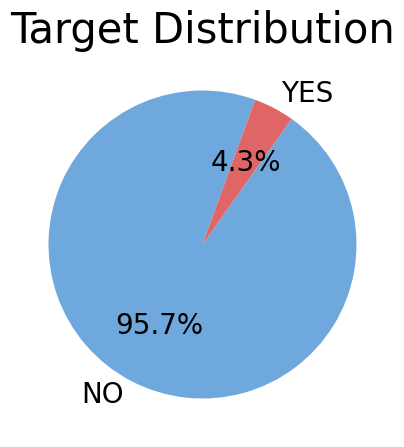

In [6]:
import matplotlib.pyplot as plt
# Target Values distribution
target_dict = {1:"YES", 0:"NO"}
target_counts = df['stroke'].value_counts()

target_counts = target_counts.rename(index = target_dict)
target_counts

colors = ["#6fa8dc","#e06666"]

plt.figure(figsize=(5,5))
plt.pie(target_counts, labels = target_counts.index, autopct="%.1f%%", textprops = {"fontsize":20}, colors= colors, startangle = 70) 
plt.title("Target Distribution", fontsize=30)
plt.show()

<AxesSubplot: title={'center': 'Variable Correlation'}>

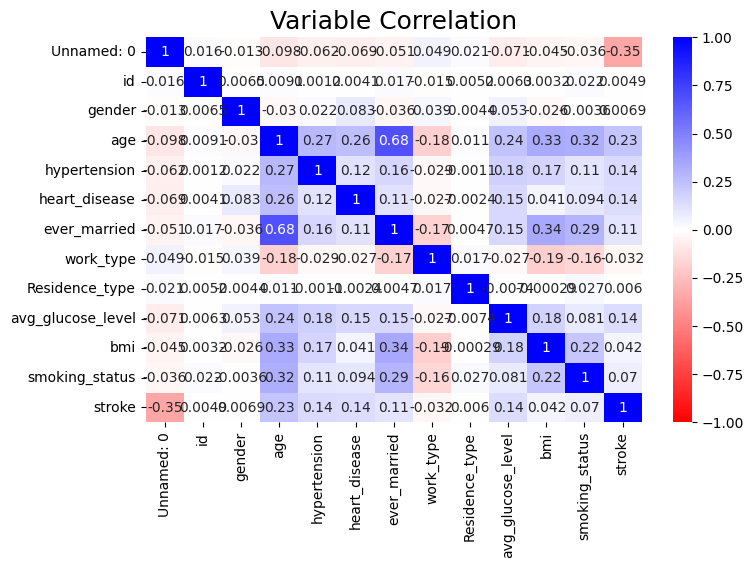

In [7]:
import seaborn as sns
# Variable Correlation
correlation=df.corr()
plt.figure(figsize=(8,5))
plt.title("Variable Correlation", size=18)
sns.heatmap(correlation, cmap="bwr_r",vmin=-1,vmax=1, annot = True)
